# Real Estate Analysis

In [1]:
#importing the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms

In [2]:
#importing data
data = pd.read_excel('Linear Regression.xlsx')
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


## 1. Checking for null, info, dtype, describe

In [3]:
data.isna().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [4]:
data.info()    #information the the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.3 KB


In [5]:
data.dtypes   #data types of all the columns

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

In [6]:
data.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


##  2. Performing Explotary Data Analysis (EDA)

Histogram of  sqft_living


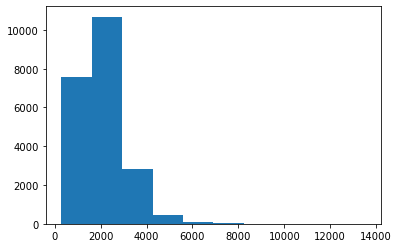

Histogram of  bedrooms


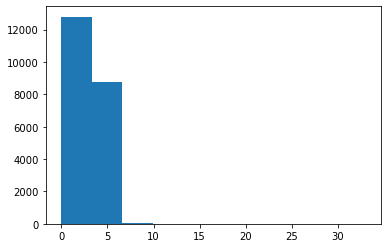

Histogram of  bathrooms


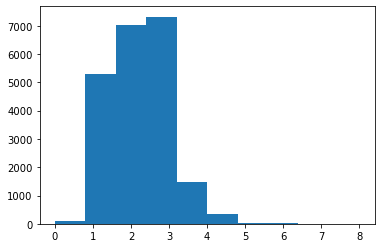

Histogram of  floors


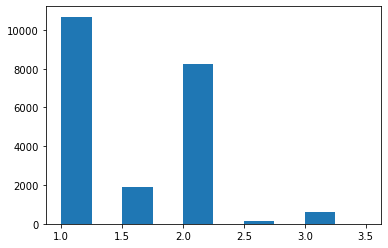

In [7]:
ind_var = ['sqft_living', 'bedrooms', 'bathrooms', 'floors']
for i in ind_var:
    print("Histogram of ", i)
    plt.hist(data[i])
    plt.show()

In [8]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


<Figure size 1080x576 with 0 Axes>

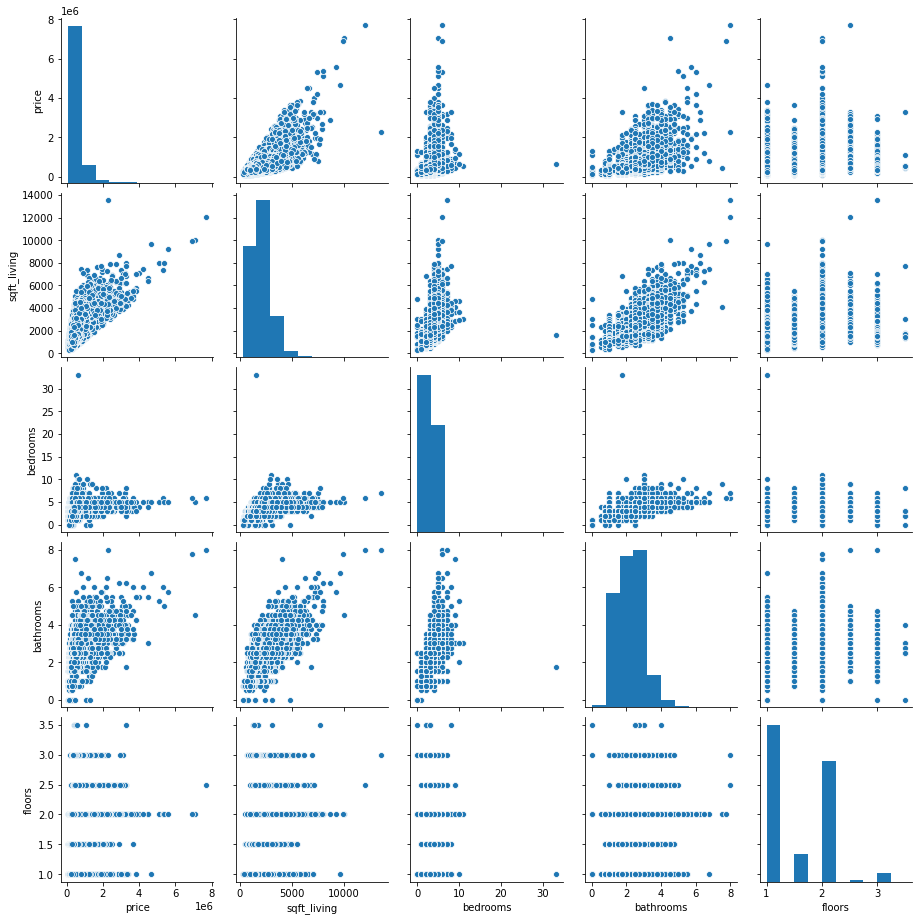

In [9]:
plt.figure(figsize=(15,8))
sms.pairplot(data)

BoxPlot of  sqft_living


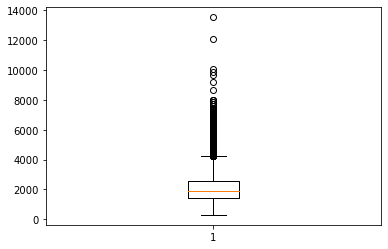

BoxPlot of  bedrooms


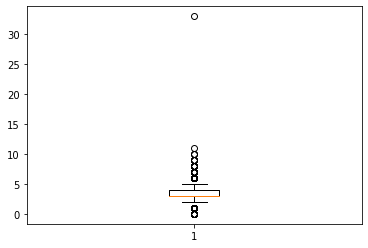

BoxPlot of  bathrooms


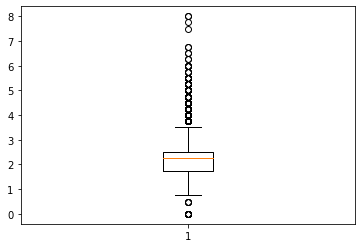

BoxPlot of  floors


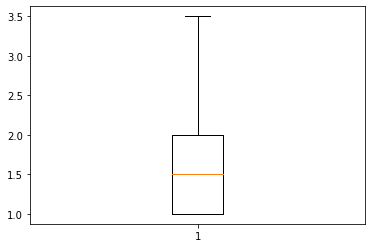

In [10]:
for i in ind_var:
    print("BoxPlot of ", i)
    plt.boxplot(data[i])
    plt.show()

# 3. Assigning the records as DV and IDV

In [11]:
y = data.iloc[:,:1] #dependent variable 
x = data.iloc[:,1:] #independent variable 

# 4. Spliting the records for testing and training 

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 5)

In [13]:
x_train.head()

,sqft_living,bedrooms,bathrooms,floors
17639,1930,3,2.00,1.0
11482,2520,4,2.50,2.0
14834,1280,3,1.00,1.5
17221,2500,4,2.25,2.0
7112,1560,3,2.00,1.0


In [14]:
x_test.head()

,sqft_living,bedrooms,bathrooms,floors
17485,2800,4,2.5,2.0
15164,1250,3,1.0,1.0
18449,1540,3,1.0,1.0
6828,1910,4,1.5,1.5
18281,3320,3,2.5,1.0


In [15]:
y_train.head()

,price
17639,390000
11482,1125000
14834,240000
17221,760000
7112,528000


In [16]:
y_test.head()

,price
17485,365000
15164,225000
18449,384950
6828,657500
18281,959000


# 5. Model Building

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=False)

# Training the model

In [18]:
lin_reg.fit(x_train, y_train)

LinearRegression()

# Testing the model

In [19]:
ypred = lin_reg.predict(x_test)

In [20]:
ypred

array([[ 727583.89230409],
       [ 298483.9890715 ],
       [ 387775.43219304],
       ...,
       [1124816.41206065],
       [1043281.94571302],
       [ 276930.88211113]])

# 6. Result / Performance of the model 

In [21]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE = np.sqrt(mean_squared_error(y_test, ypred))
r_2 = r2_score(y_test, ypred)
print("RMSE value is: ", RMSE)
print("r-squared value is: ", r_2)

RMSE value is:  258262.25991927698
r-squared value is:  0.5190626764637292
